In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# oread_csv문자./krx.csv의미한다
# Symbol같은 경우 앞에 0이 들어가 있기 때문에 숫자로 변환되면서 0이 누락되는 것을 방지하기 위함
df = pd.read_csv('krx.csv', dtype={'Symbol':object})
df.shape


def get_font_family():
    """
    시스템 환경에 따른 기본 폰트명을 반환하는함수
    """
    import platform
    system_name = platform.system()
    # colab 사용자는 system_name이 ' Linux'로 확인
    
    if system_name == 'Darwin':
        font_family = 'AppleGothic'
    elif system_name == 'Windows':
        font_family = 'Malgun Gothic'
    else:
        # Linux
        # colab에서는 runtime을 <꼭> 재시작 해야 한다.
        # 런타임을 재시작 하지 않고 폰트 설치를 하면 기본 설정 폰트가 로드되어 한글이 깨짐
        !apt-get update -qq
        !apt-get install fonts-nanum -qq > /dev/null
        
        import matplotlib.font_manager as fm
        
        fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
        font = fm.FontProperties(fname=fontpath, size=9)
        fm._rebuild()
        font_family = 'NanumBarunGothic'
    return font_family

font_family = get_font_family()
# 폰트설정
plt.rc('font', family=font_family)

Text(0.5, 1.0, '섹터별 빈도수')

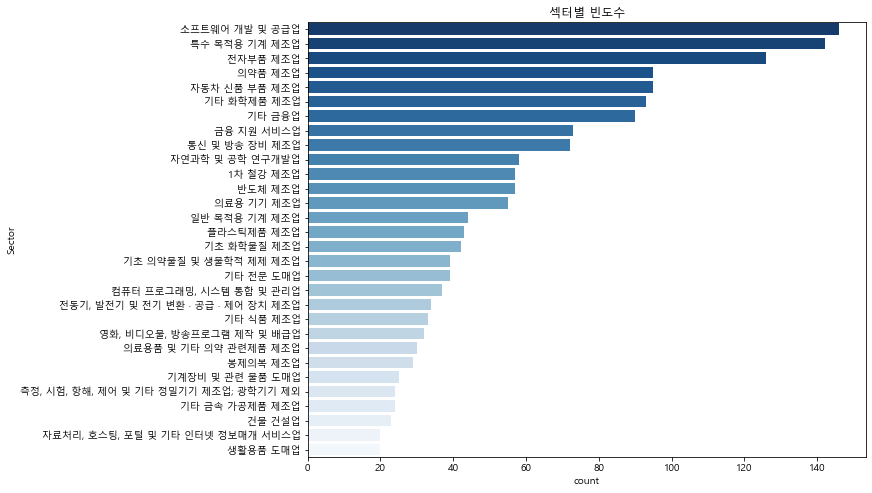

In [19]:
# 상위 30개 많은 값
sector_count_top = df['Sector'].value_counts().head(30)

df_sector_30 = df[df['Sector'].isin(sector_count_top.index)]

plt.figure(figsize=(10,8))
sns.countplot(data=df_sector_30, y='Sector', palette='Blues_r',
              order=sector_count_top.index).set_title('섹터별 빈도수')

In [3]:
pd.crosstab(df['Market'], df['Region'])

Region,강원도,경기도,경상남도,경상북도,광주광역시,대구광역시,대전광역시,미국,부산광역시,서울특별시,...,울산광역시,인천광역시,일본,전라남도,전라북도,제주특별자치도,충청남도,충청북도,케이맨 제도,홍콩
Market,,,,,,,,,,,,,,,,,,,,,
KONEX,7,34,1,5,5,1,7,0,2,50,...,0,4,0,3,1,1,3,9,0,0
KOSDAQ,16,505,48,40,9,33,37,6,39,533,...,9,57,3,12,15,2,68,58,4,8
KOSPI,4,151,42,20,9,21,7,0,36,414,...,16,25,0,7,11,7,26,15,1,0


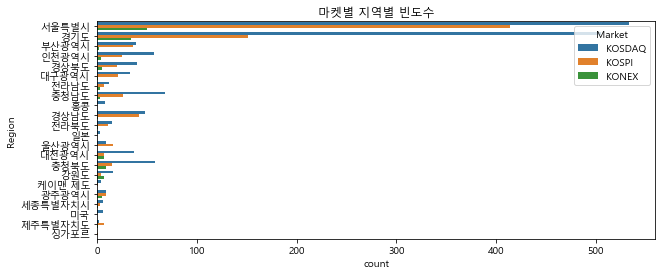

In [9]:
plt.figure(figsize=(10, 4))
#plt.xticks(rotation=90)

#sns.countplot(data=df, y='Region', hue='Market').set_title('마켓별 지역별 빈도수')
# 변수에 담아주면 log가 출력되지 않는다
g = sns.countplot(data=df, y='Region', hue='Market').set_title('마켓별 지역별 빈도수')

In [13]:
df['ListingDate'] = pd.to_datetime(df['ListingDate'])
df['ListingYear'] = df['ListingDate'].dt.year

market_year = df.groupby(['Market', 'ListingYear'])['Symbol'].count()
market_year.unstack().fillna(0).astype(int)

df_market_year = market_year.reset_index()
df_market_year = df_market_year.rename(columns={'Symbol': 'count'})

<AxesSubplot:xlabel='ListingYear', ylabel='count'>

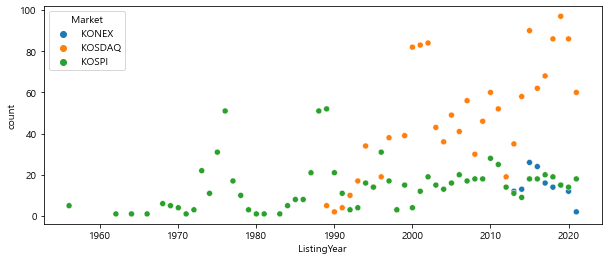

In [15]:
plt.figure(figsize=(10,4))
sns.scatterplot(data=df_market_year, x='ListingYear', y='count', hue='Market')

<AxesSubplot:xlabel='ListingYear', ylabel='count'>

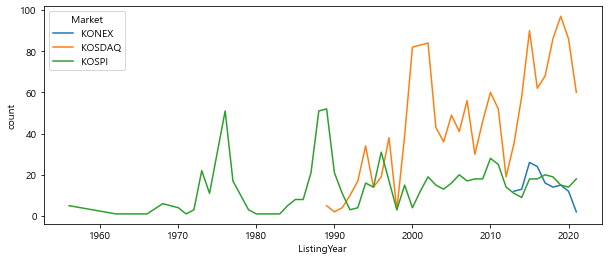

In [19]:
# ci 신뢰구간 n_boot 부트스트랩핑
# ci를 사용하면 그만큼 오래걸린다
plt.figure(figsize=(10,4))
sns.lineplot(data=df_market_year, x='ListingYear', y='count', hue='Market', ci=None)

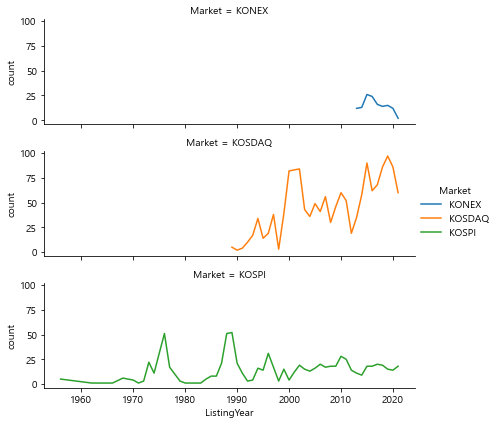

In [26]:
# relplot으로 subplot 그리기
# plt.figure(figsize=(10,4))  해당 옵션이 적용되지 않음
sns.relplot(
            data=df_market_year,
            x='ListingYear',
            y='count',
            hue='Market',
            row='Market',
            kind='line',
            height=2,
            aspect=3
            )